## Upload Data Files to Your Jupyter Account and Pack the Data

Below, we have provided a more compact version of the code you used last week to examine your data and then do some averaging to pack it. Once you have saved a set of data from the oscilloscope, and uploaded it to your Jupyter account, the entire code runs in one cell. You will probably need to run it several times until you are satisfied with the final output. The key pieces of code that you will need to alter are indicated by notes in Red, and include:
- the name for your uploaded raw data file
- the zoomed in flat range you use to examine the noise and measure the standard deviation
- the number of points you want to average when packing the data
- a new index range that you can use to trim unwanted data at the start or end of the time range
- the filename you will use to save your packed and trimmed data 

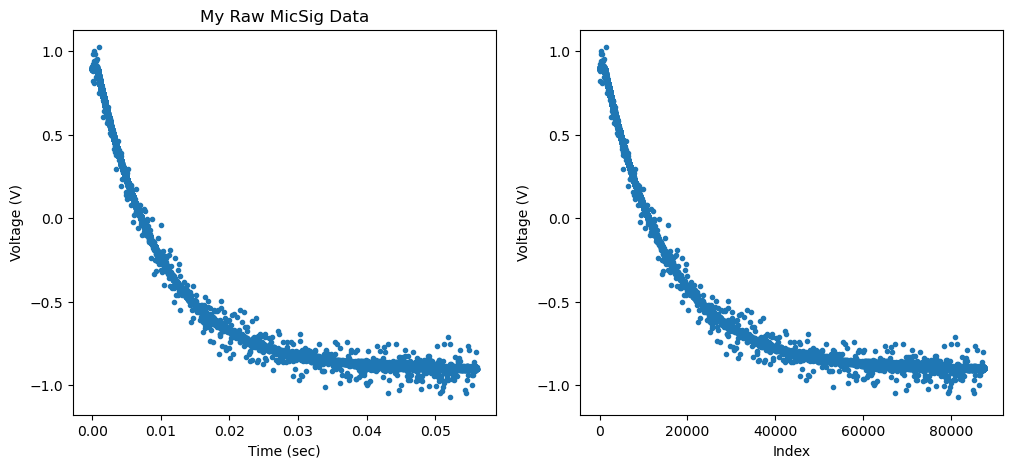

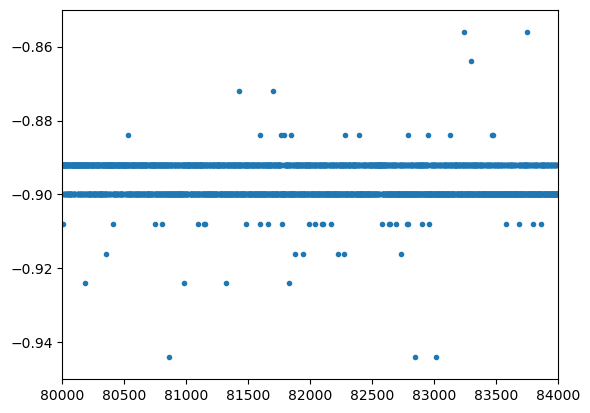

mean =  -0.896541
standard deviation =  0.007798930631823829


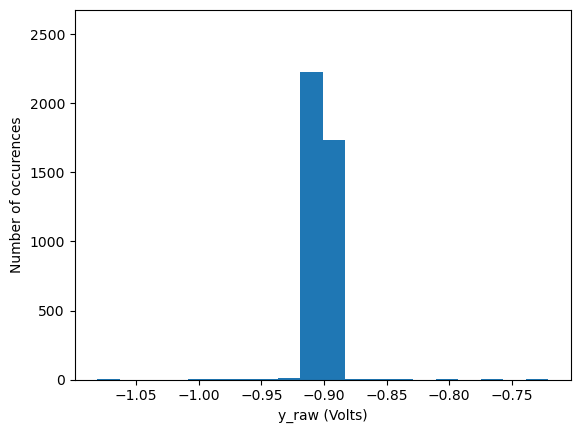

packing is done by averaging 100 data points
packed data has been trimmed from  0 to  875


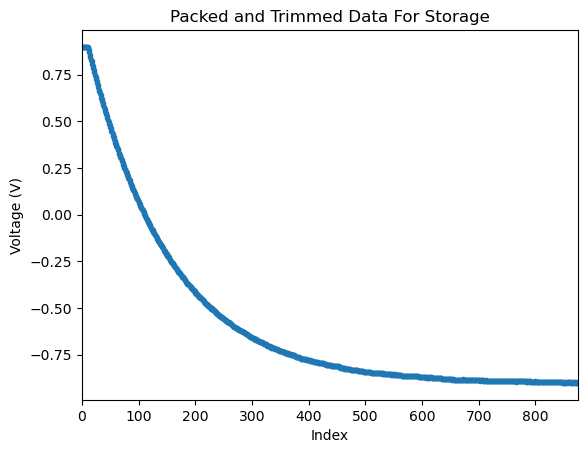

Packed Data Stored in  RC20k_pack.csv


In [1]:
# import the  necessary libraries and rename them
import numpy as np
import array
import pandas as pd
import matplotlib.pyplot as plt

"""
Modify the following line to change the file name containing your raw data
"""
fname = 'RC20k.csv'

# read in data - the file is assumed to be in csv format (comma separated variables). 
#Files need to be specified with a full path OR they have to be saved in the same folder 
#as the script
data = np.loadtxt(fname, delimiter=',', comments='#',usecols=(3,4),skiprows=1)
#data = np.loadtxt(fname, delimiter=',',comments='#' )
# access the data columns and assign variables xraw and yraw
#generate  an array  xraw  which is the first  column  of  data.  Note the first column is 
#indexed as  zero.
xraw = data[:,0]
#generate  an array  yraw  which is the second  column  of  data  (index  1)
yraw = data[:,1]
#generate array containing index
indexraw=np.arange(len(xraw))

# plot data versus time and data versus index
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax1.scatter(xraw, yraw,marker='.')
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Voltage (V)')
ax1.set_title('My Raw MicSig Data')
ax2 = fig.add_subplot(122)
ax2.scatter(indexraw,yraw,marker='.')
ax2.set_xlabel('Index')
ax2.set_ylabel('Voltage (V)')
plt.show()


# plot a restricted index range where the data is flat
# and calculate the standard deviation to assess the noise
"""
Modify the following lines to change the data range until you reach a flat range
"""

# choose data range
indexraw_min = 80000
indexraw_max = 84000

# change axis limits
plt.xlim(indexraw_min,indexraw_max)
plt.ylim(-0.95,-0.85)

# plot the data versus index
plt.scatter(indexraw,yraw,marker='.')

# This next command displays the index plot. 
plt.show()

#calculate and display the mean and standard deviation of the data that you have zoomed in on.
y_ave = np.mean(yraw[indexraw_min:indexraw_max])
y_std = np.std(yraw[indexraw_min:indexraw_max])
print('mean = ',y_ave)
print('standard deviation = ', y_std)

# display a histogram of the data
hist,bins = np.histogram(yraw[indexraw_min:indexraw_max],bins=20)
plt.bar(bins[:-1],hist,width=bins[1]-bins[0])
plt.ylim(0,1.2*np.max(hist))
plt.xlabel('y_raw (Volts)')
plt.ylabel('Number of occurences')
plt.show()

"""
Modify the following line to change the number of data points to average when you pack the data
"""
#define packing factor  npac
npac=100

#define a function  to pack the data
def pack(A,p):
  # A is an array, and p is the packing factor
  B = np.zeros(len(A)//p)
  i = 1
  while i-1<len(B):
    B[i-1] = np.mean(A[p*(i-1):p*i])
    i += 1
  return B
# pack the data
x=pack(xraw,npac)
y=pack(yraw,npac)

#create a vector that also has the integer index (index = 0,1,2 ... length-1)
length=len(x)
#print(length)
index = np.arange(length)

#create a vector that contains fixed uncertainty for x values (in this case set to zero
sigmax = [0]*length
#print(sigmax)

#Create a vector that contains uncertainty of averaged y values. 
#sigmayraw is your estimate of the uncertainty in individual raw data points

#Here it is taking that value from your previous statistics code 
#If you think the standard deviation of your data is an underestimate of the uncertainty,
#you can also enter a value by hand - just change the line that defines simayraw
sigmayraw = y_std

#sigmaymean is the uncertainty of y after averaging npac points together
#sigmay is an array of uncertainties, all of the same value as sigmaymean
sigmaymean = sigmayraw/np.sqrt(npac)
sigmay = [sigmaymean]*length

"""
Modify the following two lines if you want to trim data points from the beginning or end of your packed data
The default here is from zero to the full length of the packed data. 
Note that this length will be much smaller than the raw data because of the averaging/packing.
"""

# trim data set range before output to .csv file
index_min = 0
index_max = length

print('packing is done by averaging', npac, 'data points')
print('packed data has been trimmed from ', index_min, 'to ', index_max)

# plot the trimmed data versus index
plt.errorbar(index,y,yerr=sigmay,marker='.',linestyle='')
## marker='o' : use markers to indicate each data point (x_1,y_1),(x_2,y_2)
## linestyle= '' : no line is drawn to connect the data points
## linestyle= '-' : a line is drawn to connect the data points

# change axis limits
plt.xlim(index_min,index_max)

# add axis labels
plt.title('Packed and Trimmed Data For Storage')
plt.xlabel('Index')
plt.ylabel('Voltage (V)')
plt.show()

# Create Array and output as CSV file in four-column format with two-row headers

header = [np.array(['time','u[time]','Voltage','u[Voltage]']), 
np.array(['(sec)','(sec)','(V)','(V)'])]
d1 = [x[index_min:index_max] , sigmax[index_min:index_max] , y[index_min:index_max] , sigmay[index_min:index_max]]
d1_a = np.array(d1)
df = pd.DataFrame(np.transpose(d1_a), columns=header )   
    
# print(df)


"""
Modify the following line to change the name of the file to store your packed data
"""

output_name = 'RC20k_pack.csv'
csv_data = df.to_csv(output_name, index = False)
print('Packed Data Stored in ', output_name)